In [4]:
import scipy 
import numpy as np
import sympy as sym
import math

from scipy import fabs
from numpy import pi
from scipy import special
import scipy.integrate as integrate
import cmath

import scipy.special as s
import matplotlib.pyplot as plt


In [5]:
lamb = 1064*10**(-9)


In [6]:
k = 2*pi/lamb

# ETAPA 1 - PARÂMETROS DA FW

In [8]:
def F_z(z, L):

    values = []

    if (z >= L/12 and z <= 11*L/12):
        expoente = -5*((z - 0.5*L)**2*1/L**2)
        value = np.exp(expoente)*np.cos(6*pi*z/L)
    else:
        value = 0
  
    return(value)

In [9]:
def figura1():
    F_values = []
    L = 400*10**(-6)

    Z = np.linspace(0, L, 200)
    for z in Z: 
        F_values.append(abs(F_z(z, L))**2)

    plt.plot(Z, F_values, 'r')

    plt.xlabel('z')
    plt.grid()
    plt.show()

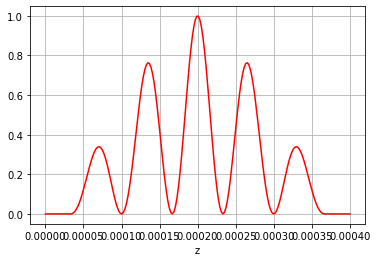

In [13]:
figura1()

In [10]:
def complex_integrate(L, q, a, b):

    func = lambda iz: F_z(iz, L) * np.exp( 1j * ((2*(np.pi)*q)/L) * iz)

    real_func = lambda x: func(x).real
    imag_func = lambda x: func(x).imag

    real_integral = integrate.quad(real_func, a, b)
    imag_integral = integrate.quad(imag_func, a, b)

    if imag_integral[0] == 0.0:
        return real_integral[0]

    return real_integral[0] + 1j*imag_integral[0]

In [11]:
def Aq(q, L):

    frac = 1/L
    integ = complex_integrate(L, q, 0, L)

    return frac*integ

In [16]:
def figura2areal():
    L = 400*10**(-6)
    values = []
    Q = np.arange(-75, 76)

    for q in Q:
        values.append((Aq(q, L).real))

    #print(values)
    plt.figure(figsize=[7,5])
    plt.plot(Q, values, 'r.-')

    #plt.ylim(-14, 0)
    plt.xlabel('q')
    plt.grid()
    plt.show()

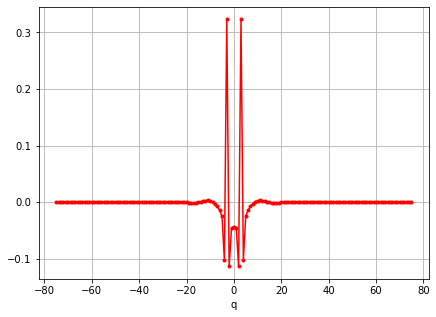

In [17]:
figura2areal()

In [18]:
def figura2aimag():
    L = 400*10**(-6)
    values = []
    Q = np.arange(-75, 76)

    for q in Q:
        values.append((Aq(q, L).imag))

    #print(values)
    plt.figure(figsize=[7,5])
    plt.plot(Q, values, 'r.-')

    #plt.ylim(-14, 0)
    plt.xlabel('q')
    plt.grid()
    plt.show()

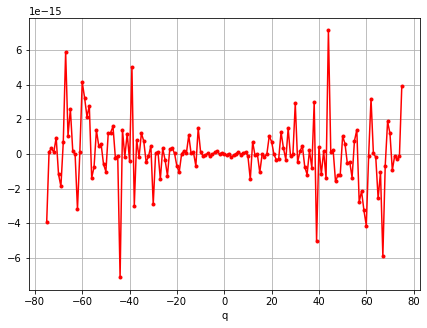

In [19]:
figura2aimag()

In [22]:
def figura2a():
    L = 400*10**(-6)
    values = []
    Q = np.arange(-75, 76)

    for q in Q:
        values.append(np.log(abs(Aq(q, L))))

    #print(values)
    plt.figure(figsize=[7,5])
    plt.plot(Q, values, 'r.-')

    plt.ylim(-14, 0)
    plt.xlabel('q')
    plt.grid()
    plt.show()

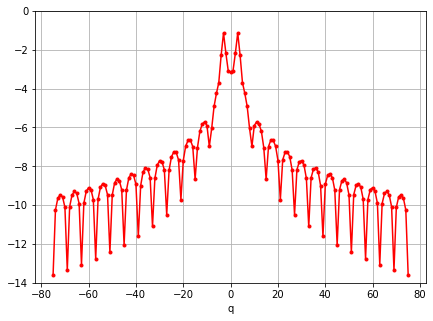

In [23]:
figura2a()

In [25]:
def figura2b():
    values = []
    Q = np.arange(-65, 65)
    L = 400*10**(-6)

    for q in Q:
        values.append(cmath.phase(((Aq(q, L)))))


    plt.plot(Q, values, 'r.-')
    plt.xlabel('q')
    plt.grid()
    plt.show()

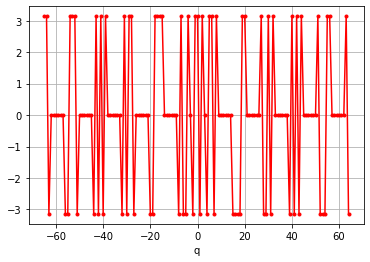

In [26]:
figura2b()

# $\psi(\rho, z)$


In [12]:
def psi(rho, z):

    Q = 0.8*k
    L = 400*10**(-6)
    soma = []
    total = 0
    N = 75
    qs = np.arange(-75, 75)

    for q in qs:

        k_zq = Q + 2*np.pi*q/L

        k_pq = math.sqrt(k**2 - k_zq**2)

        a = Aq(q, L)

        j0 = scipy.special.j0(k_pq *rho) 
        exponencial = np.exp(-1j * k_zq * z)

        soma = a * j0 * exponencial
      
        total += soma

    return total
  

In [30]:
def figura3():

    Psi_values = []
    L = 400*10**(-6)

    Z = np.linspace(0, L, 100)

    for z in Z: 
        Psi_values.append(abs(psi(0, z))**2)

    plt.plot(Z, Psi_values, 'b')
    plt.xlabel('z')
    plt.grid()
    plt.show()

In [ ]:
Z = np.linspace(0, L, 100)

print('Psi:', abs(psi(0, 0))**2, 'z:', 0)
print('Psi:', abs(psi(0, L/2))**2, 'z:', L/2)
print('Psi:', abs(psi(0, L/3))**2, 'z:', L/3)
print('Psi:', abs(psi(0, L/4))**2, 'z:', L/4)

Psi: 6.857862371589364e-08 z: 0
Psi: 1.0000001253063746 z: 0.00019999999999999998
Psi: 0.75742565816565 z: 0.0001333333333333333
Psi: 1.5827630692577616e-09 z: 9.999999999999999e-05


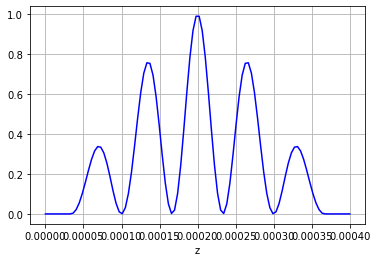

In [31]:
figura3()

# Fatores de forma especiais 
 - $g_n = \frac{-2}{n(n+1)} ∑_{q = -N}^{N} \frac{A_q}{1 + k_{zq}} \left[π^{1}_n \left(\frac{k_zq}{k}\right) + τ^{1}_{n}\left(\frac{k_{zq}}{k}\right)\right] e ^{-i k_{zq}z_0}$ 
 - $\pi_{n}^{m}(x) = \frac{P_{n}^{m}(x)}{\sqrt{1-x^2}}$
 - $\tau^{m}_{n}(x) = \sqrt{1 - x^2} \frac{d P_{n}^{m}(x)}{dx} = \frac{-(n+1) x P^{m}_{n}(x) + (n - m + 1) P_{n+1}^{m}(x)}{\sqrt{1 - x^2}}$



In [13]:
def pi_n(m, n, x):
    
    fator = cmath.sqrt(1 - x**2)
    
    
    frac =  1/fator

    aux = special.lpmn(m, n, x)[0]

    pi_val = aux[m][n]*frac
    
    return pi_val

In [14]:
def tau_n(m, n, x):

    fator = cmath.sqrt(1 - x**2)

    aux = special.lpmn(m, n, x)[1]
    
    tau_val = -(fator)*aux[m][n]
    return tau_val

In [34]:
def figura4a():

    n1 = []
    n2 = []
    n3 = []

    X = np.linspace(0, 1, 200)

    for x in X:
        n1.append(tau_n(1, 1, x))

    for x in X:
        n2.append(tau_n(1, 2, x))
  
    for x in X:
        n3.append(tau_n(1, 3, x))

    plt.figure(figsize=[7,5])
    plt.plot(X, n1, 'b', label='n1')
    plt.plot(X, n2, 'r', label='n2')
    plt.plot(X, n3, 'g', label='n3')

    plt.ylim(-6, 6)
    plt.xlabel('x')
    #plt.ylabel('')
    plt.legend()
    plt.grid()
    plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


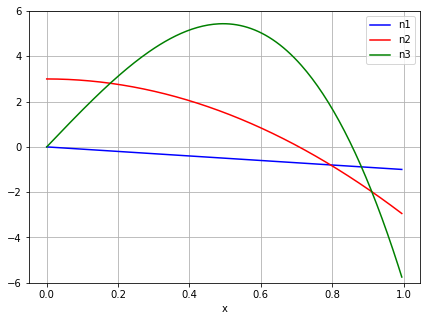

In [35]:
figura4a()

In [36]:
def figura4b():

    n1 = []
    n2 = []
    n3 = []

    X = np.linspace(0, 0.99, 200)

    for x in X:
        n1.append(pi_n(1, 1, x))

    for x in X:
        n2.append(pi_n(1, 2, x))
  
    for x in X:
        n3.append(pi_n(1, 3, x))

    plt.plot(X, n1, 'b', label ='n1')
    plt.plot(X, n2, 'r', label='n2')
    plt.plot(X, n3, 'g', label='n3')

    plt.ylim(-6, 2)
    plt.xlabel('x')
    #plt.ylabel('')
    plt.legend()
    plt.grid()
    plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


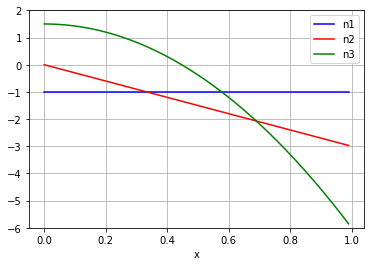

In [37]:
figura4b()

# $g_n(x)$

In [15]:
def gn(n, N, k, L, Q, z0):

    soma = []
    total = 0
    Q = 0.8*k
    L = 400*10**(-6)

    primeiroTermoDem = n*(n + 1)
    qs = np.arange(N, (-N + 1))

    for q in qs:

        k_zq = Q + ((2*np.pi*q)/L)
        k_termo = k_zq/k
        primeiroTermoSum = Aq(q, L)/(1 + k_termo)
        primeiroTermoMul = (pi_n(1, n, k_termo)) + (tau_n(1, n, k_termo))
        exponencial = np.exp(1j * k_zq * z0)

        soma = primeiroTermoSum * primeiroTermoMul * exponencial
        total += soma
  

    gn = (-2/primeiroTermoDem)*(total)

    return gn


In [41]:
def figura5a():
    n1 = []
    n2 = []
    n3 = []

    Z0 = np.linspace(0, 400*10**(-6), 100)

    for z0 in Z0:
        n1.append(abs(gn(1, z0)))
        n2.append(abs(gn(2, z0)))
        n3.append(abs(gn(3, z0)))


    plt.plot(Z0, n1, 'b', label ='n1')
    plt.plot(Z0, n2, 'r', label='n2')
    plt.plot(Z0, n3, 'g', label='n3')

    plt.ylim(0, 1)
    plt.xlabel('z')
    plt.ylabel('|$g_n$|')
    plt.legend()
    plt.grid()
    plt.show()

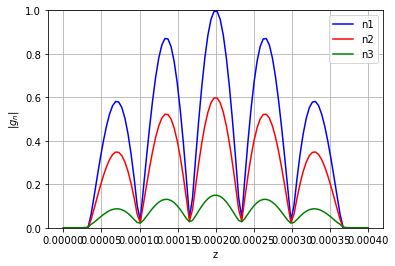

In [42]:
figura5a()

In [ ]:
def figura5b():
    n1 = []
    n2 = []
    n3 = []

    Z0 = np.linspace(0, 400*10**(-6), 200)

    for z0 in Z0:
        n1.append(cmath.phase(gn(1, z0)))
        n2.append(cmath.phase(gn(2, z0)))
        n3.append(cmath.phase(gn(3, z0)))

    plt.plot(Z0, n1, 'b', label ='n1')
    plt.plot(Z0, n2, 'r', label='n2')
    plt.plot(Z0, n3, 'g', label='n3')

    plt.xlabel('z')
    plt.ylabel('|$g_n$|')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
figura5b()

# Fator de Assimetria $J_1$

In [17]:
L = 400*10**(-6)

In [18]:
z = np.linspace(0, L, 50)

In [19]:
#spherical bessel function 1 type 
# j_n = spherical_jn(n, z, derivative = bool) = j_n
def js_n(n):
    return s.spherical_jn(n, z, False)

#spherical bessel function 2 type
#y_n = spherical_jn(n, z, derivative = bool)
def ys_n(n):
    return s.spherical_yn(n, z, False)

#Ricatti Bessel 1type given by = x*(j_n(x))
def psiBessel(n, x):
    a = x*(s.spherical_jn(n, z, False))
    return a

#Ricatti Bessel 1type derivative
derivativePsiBesseln = (lambda n, x: ((1 + n)*s.spherical_jn(n, x, False) - (x*s.spherical_jn((n + 1), x, False))))

#Spherical Hankel H2 function 
def sphericalHankel_n(n, x):
    js_n = s.spherical_jn(n, x, False)
    ys_n = s.spherical_yn(n, x, False)
    return js_n - (ys_n*1j)

#Ricatti Bessel 2 type 
def RiccatiBessel_2Type(n, x):
    return x*(sphericalHankel_n(n, x))

#spherical hankel H2 derivative
def derivativeSphericalHankel_n(n, x):
    return (1+n)*sphericalHankel_n(n, x) - x*sphericalHankel_n((n+1), x)


In [20]:
#coefficient C_n
def cs_n(M, mi, n, x):
    m = M
    dem = (m*mi*((RiccatiBessel_2Type(n, x)*derivativePsiBesseln(n, x)) - derivativeSphericalHankel_n(n, x)*psiBessel(n, x)))
    num = (mi*RiccatiBessel_2Type(n, x)*derivativePsiBesseln(n, x*m) - m*derivativeSphericalHankel_n(n, x)*psiBessel(n, x*m))
    return dem/num

#list of cs values 
cs = []

#coefficient D_n
def ds_n(M, mi, n, x):
    m = M
    dem = (m*m)*(RiccatiBessel_2Type(n, x)*derivativePsiBesseln(n, x) - derivativeSphericalHankel_n(n, x)*psiBessel(n, x))
    num = (m*RiccatiBessel_2Type(n, x)*derivativePsiBesseln(n, m*x)) - (mi*derivativeSphericalHankel_n(n, x)*psiBessel(n, m*x))
    return dem/num

#list of ds values 
ds = []

#coefficient r_n
def r_n(M, n, x):
    m = M
    psiConj = np.conjugate(psiBessel(n, m*x))
    dem = (m*psiBessel(n+1, m*x)*psiConj)
    num = m*m
    return (dem.imag)/(num.imag)

#coefficient s_n
def s_n(M, n, x):
    m = M
    a = ((1j)/(2*((m**2).imag)))
    b = (m*((abs(psiBessel(n, m*x))**2)))
    c = (np.conjugate(m)) * (abs(psiBessel(n+1, m*x)))**2
    d = (m +((((2*(n + 1)*((m*m).real)/m)))))*r_n(m, n, x)
    e = (2*n + 1)*(np.conjugate(m)*r_n(m, n+1, x))

    return -a*(x*(b+c) - d + e)

In [21]:
n_max = (lambda x: math.ceil(x + 4.05*x**(1/3)+2))

In [22]:
def j_any(epslon2, m, x, z0, mi, k):
    
    n_maximo = n_max(x)
    
    a = (3*epslon2)/((abs(m)**2)*(x**3))
    soma = []
    total = 0
    N = -75
    L = 400*10**(-6)
    Q = 0.8*k


    for i in range(1, (n_maximo + 1)):
        
        cn = cs_n(m, mi, i, x)
        conjCn = np.conjugate(cn)
        
        cn1 = cs_n(m, mi, i+1, x)
        conjCn1 = np.conjugate(cn1)
        
        gnVar = gn(i, N, k, L, Q, z0)
        conjGn = np.conjugate(gnVar)
        
        gn1Var = gn(i+1, N, k, L, Q, z0)
        conjGn1 = np.conjugate(gn1Var)
        
        rn = r_n(m, i, x)
        rn1 = rn = r_n(m, i+1, x)
        
        dn = ds_n(m, mi, i, x)
        conjDn = np.conjugate(dn)
        
        dn1 = ds_n(m, mi, i+1, x)
        sn = s_n(m, i, x)
        
        b = (i*(i+2)/m)
        c1 = ((gn1Var)*(conjGn)*(cn1)*(conjCn)*(rn1))
        c2 = (((abs(1/m)**2))*(gn1Var)*(conjGn)*(dn1)*(conjDn)*(rn))
        
        d = (i*(i+2)/(i+1))
        d1 = (gnVar)*(conjGn1)*(cn)*(conjCn1)
        d2 = ((abs(1/m)**2)*(gn1Var)*(conjGn)*(dn1)*(conjDn))
       
        f = ((2*i+1)/(i*(i+1))) * (abs(gnVar)**2)*(cn*conjDn)

        soma = b*(c1+c2) - (((d*(d1 + d2))+ f*(1/m))*s_n(m, i, x))
        total += soma

    return a*(total.imag)

In [23]:
mi = 1
#n = np.linspace(1, 2, 100)

l = 1064 * 10**(-9)
M = (1.57 - 0.038j)
M2 = (1.57 - 0.19j)
M3 = (1.57 - 0.95j)


epslon1 = (M**2).real
epslon2 = -(M**2).imag

epslon22 = -(M2**2).imag
epslon23 = -(M3**2).imag


In [ ]:
zval = np.linspace(0, 400*10**(-6), 50)

jn1_gauss_blue = []
jn2_gauss_red = []
jn3_gauss_green = []
   
#gauss bean M = 1.57 - 0.038j
for i in zval:
    jn1_gauss_blue.append(j_any(epslon2, M, 0.1, i, mi, k)*2500)
    jn2_gauss_red.append(j_any(epslon2, M, 3, i, mi, k))

In [ ]:
def graph():
    
    z_axis = np.linspace(0, 400, 50)
   
    #gauss bean M = 1.57 - 0.95j
    #for z0 in Z0:
        #n3_gauss.append(j_any(epslon2, M, 1, 8, 0.16, z0))
    
    plt.figure(figsize=[10,8])

    plt.plot(z_axis, jn1_gauss_blue[0],"b", label= "x = 0.1" )
    plt.plot(z_axis, jn2_gauss_red,"r", label= "x = 3" )    
    #plt.plot(Z0, jn3_gauss_green,"g", label= "x = 8" )

    plt.xlabel('Z0')
    plt.ylabel('J1')
    plt.title("Assymetry Factor J1 x Z0")
    #plt.legend()
    plt.grid()
    plt.show()

In [ ]:
graph()